# **OPERADORES DIFERENCIALES EN $\mathbb{R}^3$:**

**Este notebook consiste en determinar el gradiente, la divergencia y el rotacional de las dos siguientes funciones, $f$ y $g$ definidas como sigue:**

$f: \mathbb{R}^3 \rightarrow \mathbb{R}$

$\quad \vec{r}=(x,y,z) \rightarrow e^{(-x^2-y^4)}$

$g: \mathbb{R}^3 \rightarrow \mathbb{R}^3$

$\quad \vec{r}=(x,y,z) \rightarrow \frac{\vec{r}}{\lVert \vec{r} \rVert}=(\frac{x}{\sqrt{x^2+y^2+z^2}}, \frac{y}{\sqrt{x^2+y^2+z^2}}, \frac{z}{\sqrt{x^2+y^2+z^2}})$ 

Tal vez sería útil denotar a $g$ como $g(\vec{r})=\vec{g}(\vec{r})$, puesto que estamos hablando de un campo vectorial y ahorrarnos confusiones con $f$ que es un campo escalar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Definimos las funciones:**

In [2]:
def f(r):
    return np.exp((-r[0]**2)-(r[1]**4)) #f tiene 3 componentes sobre los que actúa, x,y,z, indexados como 0,1,2 en el arreglo
                                        #correspondiente al vector.

def g(r):
    return r / np.linalg.norm(r)

**Visualizamos gráficamente la función escalar:**

Text(0.5, 0.92, 'Gráfica de $f(x,y,z)=\\exp(-x^2-y^4)$')

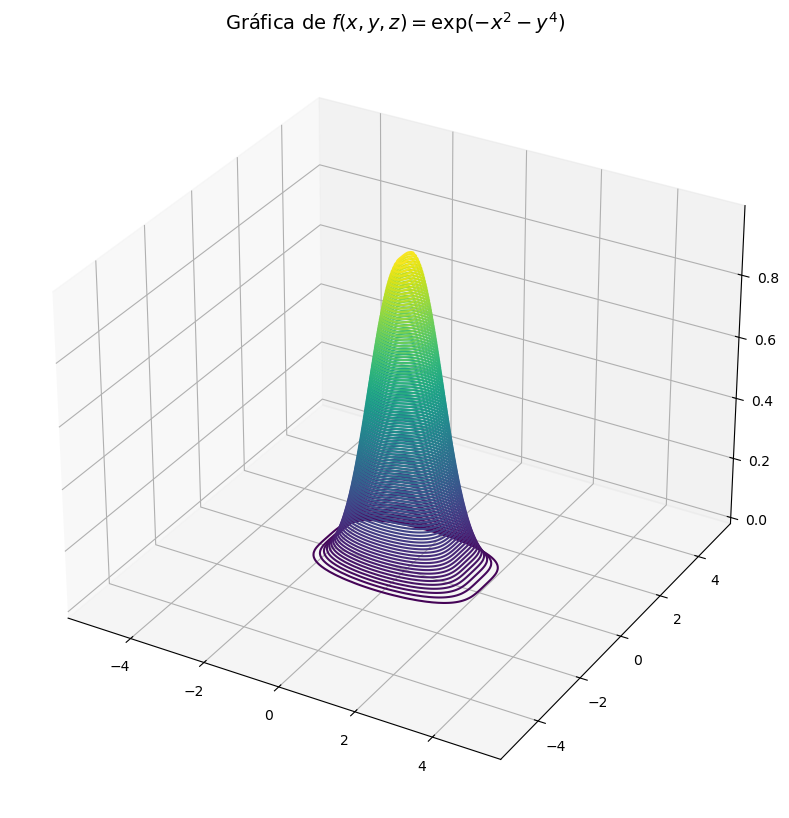

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]

x,y= np.meshgrid(np.linspace(-5,5,200),np.linspace(-5,5,200))
z= f(np.array([x,y]))

plotproj= plt.axes(projection='3d')
plotproj.contour3D(x,y,z,100)
plt.title(r"Gráfica de $f(x,y,z)=\exp(-x^2-y^4)$", fontsize=14)

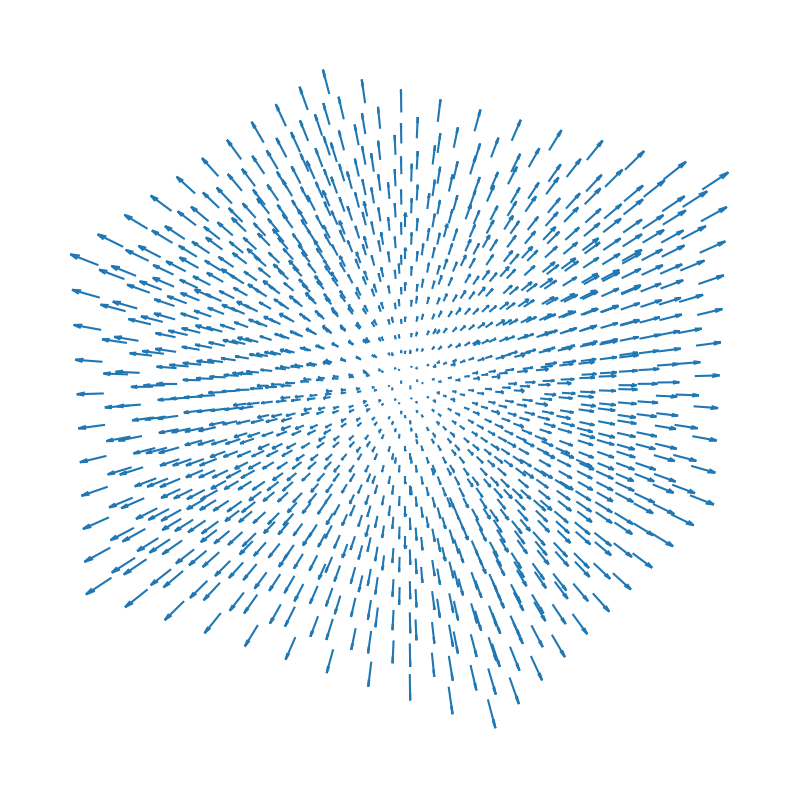

In [5]:
x, y, z = np.meshgrid(np.linspace(-2,2,11),np.linspace(-2,2,11),np.linspace(-2,2,11))
val= g(np.array([x,y,z]))

arrowplot = plt.axes(projection='3d')
arrowplot.axis(False)

scale=7
arrowplot.quiver(
    x, y, z,
    val[0]*scale,val[1]*scale,val[2]*scale
)